In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
weather_df = pd.read_csv("https://djl-lms-assets.s3.eu-central-1.amazonaws.com/datasets/weatherHistory.csv")
weather_df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [2]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [3]:
weather_df.isnull().sum()*100/weather_df.shape[0]

Formatted Date              0.000000
Summary                     0.000000
Precip Type                 0.536012
Temperature (C)             0.000000
Apparent Temperature (C)    0.000000
Humidity                    0.000000
Wind Speed (km/h)           0.000000
Wind Bearing (degrees)      0.000000
Visibility (km)             0.000000
Loud Cover                  0.000000
Pressure (millibars)        0.000000
Daily Summary               0.000000
dtype: float64

In [4]:
weather_df.nunique()

Formatted Date              96429
Summary                        27
Precip Type                     2
Temperature (C)              7574
Apparent Temperature (C)     8984
Humidity                       90
Wind Speed (km/h)            2484
Wind Bearing (degrees)        360
Visibility (km)               949
Loud Cover                      1
Pressure (millibars)         4979
Daily Summary                 214
dtype: int64

In [5]:
weather_df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [6]:
weather_df=weather_df.drop('Loud Cover',axis=1)
weather_df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)',
       'Daily Summary'],
      dtype='object')

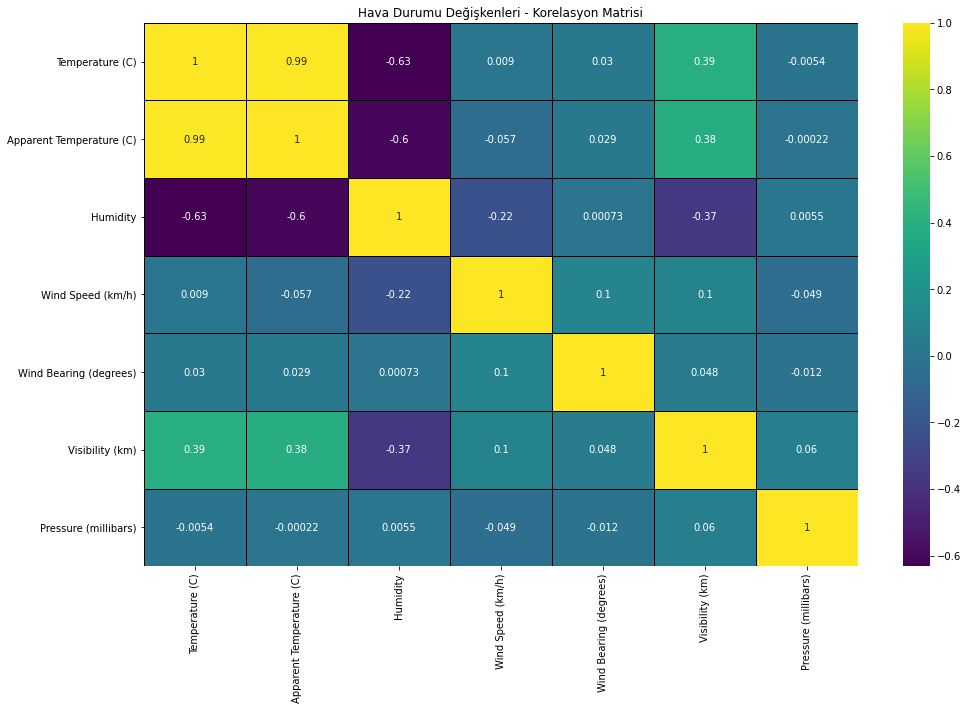

In [7]:

weather = weather_df.corr()
plt.figure(figsize=(16,10))
ax = sns.heatmap(weather, annot = True, linewidths = 1, linecolor = "black", cmap = "viridis", mask = None)
plt.title("Hava Durumu Değişkenleri - Korelasyon Matrisi")
plt.show()

In [8]:
y1 = weather_df["Temperature (C)"]
x1 = weather_df[["Humidity", "Wind Speed (km/h)", "Wind Bearing (degrees)", "Pressure (millibars)"]]
x1 = sm.add_constant(x1)
results1_model = sm.OLS(y1, x1)
results1 = results1_model.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Temperature (C)   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                 1.750e+04
Date:                Thu, 29 Apr 2021   Prob (F-statistic):               0.00
Time:                        00:04:14   Log-Likelihood:            -3.2821e+05
No. Observations:               96453   AIC:                         6.564e+05
Df Residuals:                   96448   BIC:                         6.565e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     37.9264      0.233    162.709      0.000      37.470      38.383
Humidity                 -32.4962      0.123   -264.288      0.000     -32.737     -32.255
Wind Speed (km/h)         -0.2014      0.003    -57.557      0.000      -0.208      -0.195
Wind Bearing (degrees)     0.0040      0.000     18.463      0.000       0.004       0.004
Pressure (millibars)      -0.0007      0.000     -3.452      0.001      -0.001      -0.000
==============================================================================
Omnibus:                     3375.432   Durbin-Watson:                   0.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3793.297
Skew:                          -0.455   Prob(JB):                         0.00
Kurtosis:                       3.339   Cond. No.                     1.06e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
# Hata terimi ortalamada sıfır olmalıdır

tahmin1 = results1.predict(x1)
hatalar1 = y1 - tahmin1

print(f"Hava durumu modelinin ortalama hatası: {hatalar1.mean():.16f}")

Hava durumu modelinin ortalama hatası: 0.0000000000101510


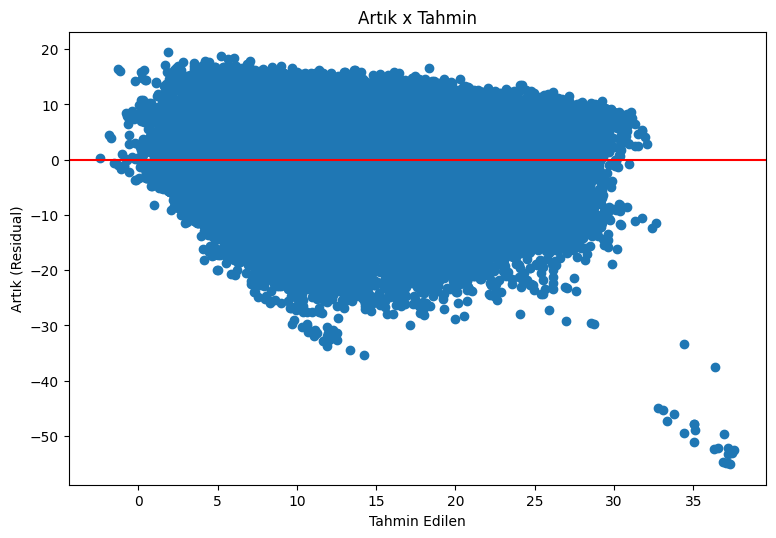

In [10]:
# homoscedasticity

plt.figure(figsize=(9,6), dpi=100)
plt.scatter(tahmin1, hatalar1)
plt.xlabel('Tahmin Edilen')
plt.ylabel('Artık (Residual)')
plt.axhline(y=0, color="r")
plt.title('Artık x Tahmin')
plt.show()

In [11]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats1 = bartlett(tahmin1, hatalar1)
lev_stats1 = levene(tahmin1, hatalar1)

print(f"Bartlett test değeri : {bart_stats1[0]} ve p değeri : {bart_stats1[1]}")
print(f"Levene test değeri   : {lev_stats1[0]} ve p değeri : {lev_stats1[1]}")

Bartlett test değeri : 2464.844656867369 ve p değeri : 0.0
Levene test değeri   : 2321.2401008573747 ve p değeri : 0.0


In [12]:
weather[["Humidity", "Wind Speed (km/h)", "Wind Bearing (degrees)", "Pressure (millibars)"]].corr()

,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Pressure (millibars)
Humidity,1.000000,-0.265396,0.053088,0.095531
Wind Speed (km/h),-0.265396,1.000000,0.068104,-0.241845
Wind Bearing (degrees),0.053088,0.068104,1.000000,-0.235462
Pressure (millibars),0.095531,-0.241845,-0.235462,1.000000


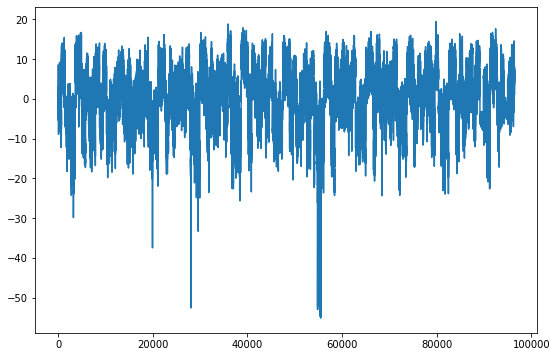

In [13]:
# hata terimleri birbiriyle ilişkisiz olmalıdır
plt.figure(figsize=(9,6))
plt.plot(hatalar1)
plt.show()

C:\Users\Emir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\Emir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


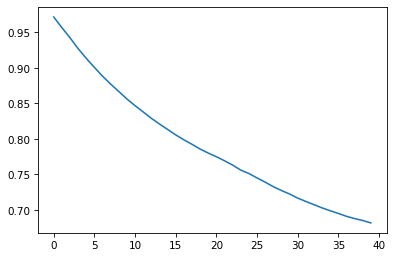

In [14]:
from statsmodels.tsa.stattools import acf

acf_data1 = acf(hatalar1)

plt.figure(dpi=75)
plt.plot(acf_data1[1:])
plt.show()

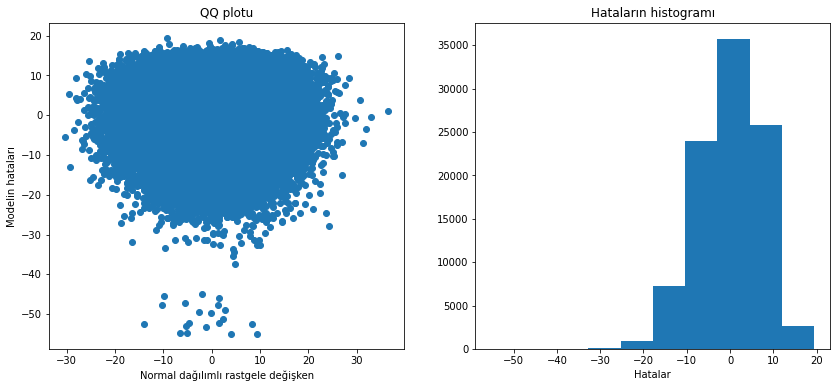

In [15]:
# özellikler hatalarla korele olmamalıdır
rand_nums1 = np.random.normal(np.mean(hatalar1), np.std(hatalar1), len(hatalar1))

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.scatter(rand_nums1, hatalar1)
plt.xlabel("Normal dağılımlı rastgele değişken")
plt.ylabel("Modelin hataları")
plt.title("QQ plotu")

plt.subplot(1,2,2)
plt.hist(hatalar1)
plt.xlabel("Hatalar")
plt.title("Hataların histogramı")

plt.show()

In [16]:
from scipy.stats import jarque_bera, normaltest

jb_stats1 = jarque_bera(hatalar1)
norm_stats1 = normaltest(hatalar1)

print(f"Jarque-Bera test değeri : {jb_stats1[0]} ve p değeri : {jb_stats1[1]:.15f}")
print(f"Normal test değeri      : {norm_stats1[0]}  ve p değeri : {norm_stats1[1]:.15f}")

Jarque-Bera test değeri : 3793.296735252327 ve p değeri : 0.000000000000000
Normal test değeri      : 3375.432307699558  ve p değeri : 0.000000000000000


**Null hipotezi olan "Hatalarımız normal dağılımlıdır.", p değerleri 0.05'ten küçük olduğu için reddedilmiştir.**


In [17]:
house_prices_df = pd.read_csv("https://djl-lms-assets.s3.eu-central-1.amazonaws.com/datasets/house_prices.csv", sep = ";")
house_prices_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [18]:
y2 = house_prices_df["SalePrice"]
x2 = house_prices_df[["OverallQual","YearBuilt","TotalBsmtSF","GrLivArea","FullBath","GarageCars","GarageArea", "TotRmsAbvGrd"]]
x2 = sm.add_constant(x2)
results2 = sm.OLS(y2, x2).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     604.0
Date:                Thu, 29 Apr 2021   Prob (F-statistic):               0.00
Time:                        00:04:21   Log-Likelihood:                -17474.
No. Observations:                1460   AIC:                         3.497e+04
Df Residuals:                    1451   BIC:                         3.501e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -7.342e+05   9.13e+04     -8.046      0.000   -9.13e+05   -5.55e+05
OverallQual   2.055e+04   1159.417     17.724      0.000    1.83e+04    2.28e+04
YearBuilt      334.8758     47.853      6.998      0.000     241.007     428.745
TotalBsmtSF     28.2315      2.917      9.678      0.000      22.509      33.954
GrLivArea       53.7550      4.187     12.838      0.000      45.542      61.968
FullBath     -5042.0409   2688.082     -1.876      0.061   -1.03e+04     230.902
GarageCars    1.074e+04   3072.603      3.496      0.000    4716.098    1.68e+04
GarageArea      16.4580     10.386      1.585      0.113      -3.915      36.831
TotRmsAbvGrd   -77.4147   1129.395     -0.069      0.945   -2292.836    2138.006
==============================================================================
Omnibus:                      477.040   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            54777.984
Skew:                          -0.438   Prob(JB):                         0.00
Kurtosis:                      32.995   Cond. No.                     2.53e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.53e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
tahmin2 = results2.predict(x2)    # https://www.statsmodels.org/stable/examples/notebooks/generated/predict.html
hatalar2 = y2 - tahmin2

print(f"Ev fiyatları modelinin ortalama hatası: {hatalar2.mean():.16f}")

Ev fiyatları modelinin ortalama hatası: -0.0000000090533644


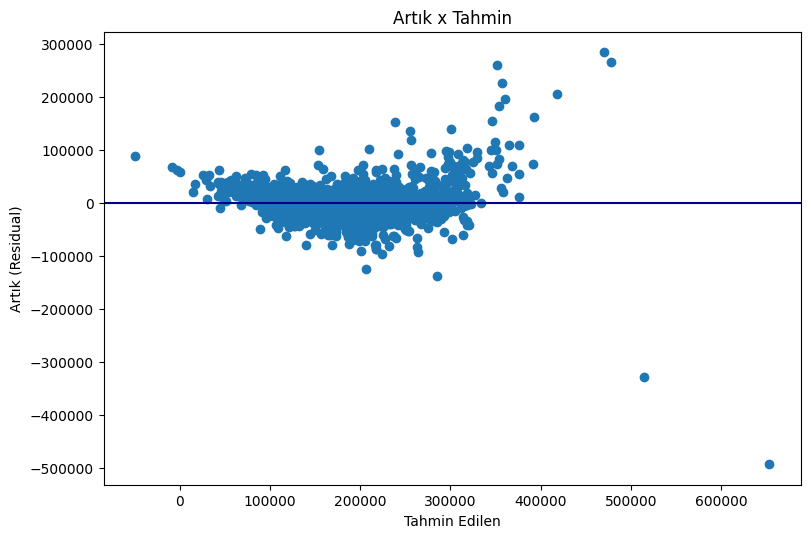

In [20]:
plt.figure(figsize=(9,6), dpi=100)
plt.scatter(tahmin2, hatalar2)
plt.xlabel('Tahmin Edilen')
plt.ylabel('Artık (Residual)')
plt.axhline(y=0, color="darkblue")
plt.title('Artık x Tahmin')
plt.show()

In [21]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats2 = bartlett(tahmin2, hatalar2)
lev_stats2 = levene(tahmin2, hatalar2)

print(f"Bartlett test değeri : {bart_stats2[0]} ve p değeri : {bart_stats2[1]}")
print(f"Levene test değeri   : {lev_stats2[0]} ve p değeri : {lev_stats2[1]}")

Bartlett test değeri : 498.61073163330394 ve p değeri : 1.9065486119696267e-110
Levene test değeri   : 499.2948041829646 ve p değeri : 3.1834896997517425e-102


**null hipotezi ("Hatalarımız eş varyanslıdır.") reddedildiği için hatalarımız değişen varyanslıdır (heteroscedastic).**


In [22]:
# açıklayıcı değişkenlerin kendi içlerindeki korelasyonu
house_prices_df[["OverallQual","YearBuilt","TotalBsmtSF","GrLivArea","FullBath","GarageCars","GarageArea", "TotRmsAbvGrd"]].corr()

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,GarageCars,GarageArea,TotRmsAbvGrd
OverallQual,1.000000,0.572323,0.537808,0.593007,0.550600,0.600671,0.562022,0.427452
YearBuilt,0.572323,1.000000,0.391452,0.199010,0.468271,0.537850,0.478954,0.095589
TotalBsmtSF,0.537808,0.391452,1.000000,0.454868,0.323722,0.434585,0.486665,0.285573
GrLivArea,0.593007,0.199010,0.454868,1.000000,0.630012,0.467247,0.468997,0.825489
FullBath,0.550600,0.468271,0.323722,0.630012,1.000000,0.469672,0.405656,0.554784
GarageCars,0.600671,0.537850,0.434585,0.467247,0.469672,1.000000,0.882475,0.362289
GarageArea,0.562022,0.478954,0.486665,0.468997,0.405656,0.882475,1.000000,0.337822
TotRmsAbvGrd,0.427452,0.095589,0.285573,0.825489,0.554784,0.362289,0.337822,1.000000


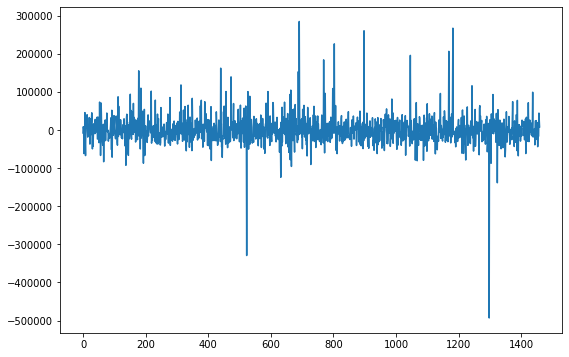

In [23]:
plt.figure(figsize=(9,6))
plt.plot(hatalar2)
plt.show()

C:\Users\Emir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\Emir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


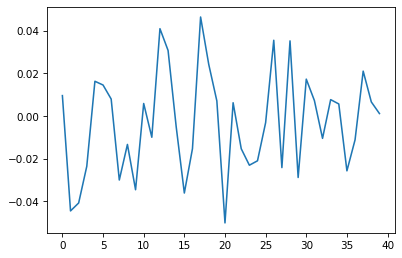

In [24]:
from statsmodels.tsa.stattools import acf

acf_data2 = acf(hatalar2)

plt.figure(dpi=75)
plt.plot(acf_data2[1:])
plt.show()

Hatalar arasında belirgin bir korelasyon yoktur.

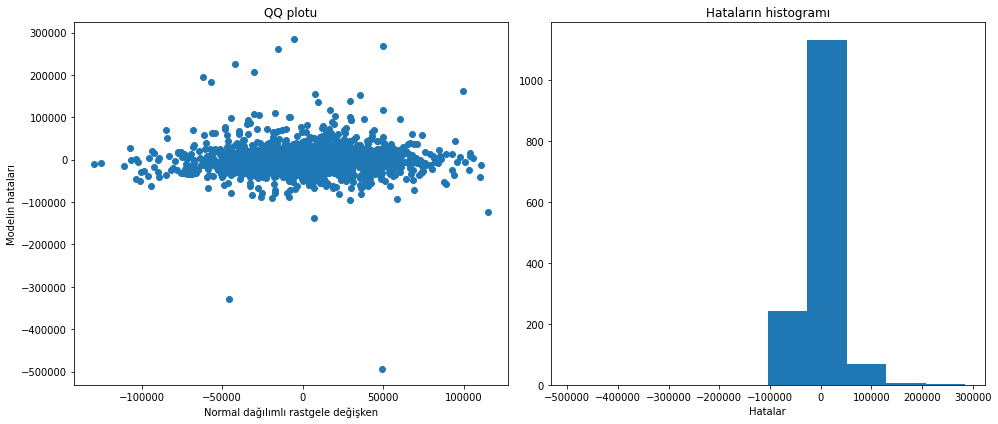

In [25]:
rand_nums2 = np.random.normal(np.mean(hatalar2), np.std(hatalar2), len(hatalar2))

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.scatter(rand_nums2, hatalar2)
plt.xlabel("Normal dağılımlı rastgele değişken")
plt.ylabel("Modelin hataları")
plt.title("QQ plotu")

plt.subplot(1,2,2)
plt.hist(hatalar2)
plt.xlabel("Hatalar")
plt.title("Hataların histogramı")

plt.tight_layout()
plt.show()

In [26]:
from scipy.stats import jarque_bera, normaltest

jb_stats2 = jarque_bera(hatalar2)
norm_stats2 = normaltest(hatalar2)

print(f"Jarque-Bera test değeri : {jb_stats2[0]} ve p değeri : {jb_stats2[1]:.15f}")
print(f"Normal test değeri      : {norm_stats2[0]}  ve p değeri : {norm_stats2[1]:.15f}")

Jarque-Bera test değeri : 54777.9839223757 ve p değeri : 0.000000000000000
Normal test değeri      : 477.0400118425779  ve p değeri : 0.000000000000000


**Null hipotezi olan "Hatalarımız normal dağılımlıdır.", p değerleri 0.05'ten küçük olduğu için reddedilmiştir.**